In [183]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [184]:
df = pd.read_csv("Surgical-deepnet.csv")
df

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14630,18.79,14.1,1,0,1,0,0,0,0,0,...,-0.54,1,0,7.78,0,1,0,-0.16,1,1
14631,19.65,12.6,0,0,0,0,0,0,0,0,...,-1.42,4,0,8.40,6,1,0,-0.77,1,1
14632,14.84,12.6,1,0,0,0,0,0,0,0,...,0.65,0,0,13.25,3,3,0,0.99,1,1
14633,17.75,8.9,0,0,1,0,0,0,1,0,...,-0.50,0,1,8.30,5,0,0,0.17,1,1


In [185]:
df.isnull().sum()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

In [186]:
X = df.drop("complication", axis=1).copy().values
Y = df["complication"].copy().values

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((11708, 24), (2927, 24), (11708,), (2927,))

In [187]:
class Perceptron:
    def __init__(self, learning_rate, input_length, activation_func):
        self.learning_rate = learning_rate
        self.weights = np.random.rand(input_length)
        self.bias = np.random.rand(1)
        self.activation_function = activation_func     

    def activation(self, x, function):
        if function == "sigmoid":
            return 1 / (1 + np.exp(-x))
        elif function == "relu":
            return np.maximum(0, x)
        elif function == "tanh":
            return np.tanh(x)
        elif function == "linear":
            return x
        else:
            raise Exception("Unknown activation function")

    def fit(self, X_train, Y_train, X_test, Y_test, epochs):
        Loss_Train = []         
        Acc_Train = []          
        Loss_Test = []          
        Acc_Test = []           
        for epoch in tqdm(range(epochs)):
            for x, y in zip(X_train, Y_train):
                # forwarding 
                y_pred = x @ self.weights + self.bias
                y_pred = self.activation(y_pred , self.activation_function)     
                # y_pred = y_pred * self.activation(y_pred, "sigmoid")

                # back propagation
                error = y - y_pred

                # updating
                self.weights += self.learning_rate * error * x
                self.bias += self.learning_rate * error

            train_loss ,train_acc = model.evaluate(X_train , Y_train)           
            test_loss ,test_acc = model.evaluate(X_test , Y_test)               

            Loss_Train.append(train_loss)                                       
            Acc_Train.append(train_acc)                                         
            Loss_Test.append(test_loss)                                         
            Acc_Test.append(test_acc)                                           

        return Loss_Train, Acc_Train, Loss_Test, Acc_Test                      

    def predict(self, X_test):
        Y_pred = []
        for x_test in X_test:
            y_pred = x_test @ self.weights + self.bias
            y_pred = self.activation(y_pred, "linear")
            Y_pred.append(y_pred)
        return np.array(Y_pred)

    def calculate_loss(self, X_test, Y_test, metric):
        Y_pred = self.predict(X_test)
        if metric == "mse":
            return np.mean(np.square(Y_test - Y_pred))
        elif metric == "mae":
            return np.mean(np.abs(Y_test - Y_pred))
        elif metric == "rmse":
            return np.sqrt(np.mean(np.square(Y_test - Y_pred)))
        else:
            raise Exception("Unknown metric")
        
    def calculate_accuracy(self, X_test, Y_test):
        Y_pred = self.predict(X_test)
        Y_pred = Y_pred.reshape(-1)
        Y_pred = np.where(Y_pred > 0.5, 1, 0)
        accuracy = np.sum(Y_pred == Y_test) / len(Y_test)
        return accuracy

    def evaluate(self, X_test, Y_test):
        loss = self.calculate_loss(X_test, Y_test, "mse")
        accuracy = self.calculate_accuracy(X_test, Y_test)

        return loss, accuracy
    
model = Perceptron(learning_rate=0.0001, input_length=X_train.shape[1], activation_func="linear")
Loss_Train, Acc_Train, Loss_Test, Acc_Test = model.fit(X_train, Y_train, X_test, Y_test, epochs=128)

100%|██████████| 128/128 [04:46<00:00,  2.24s/it]


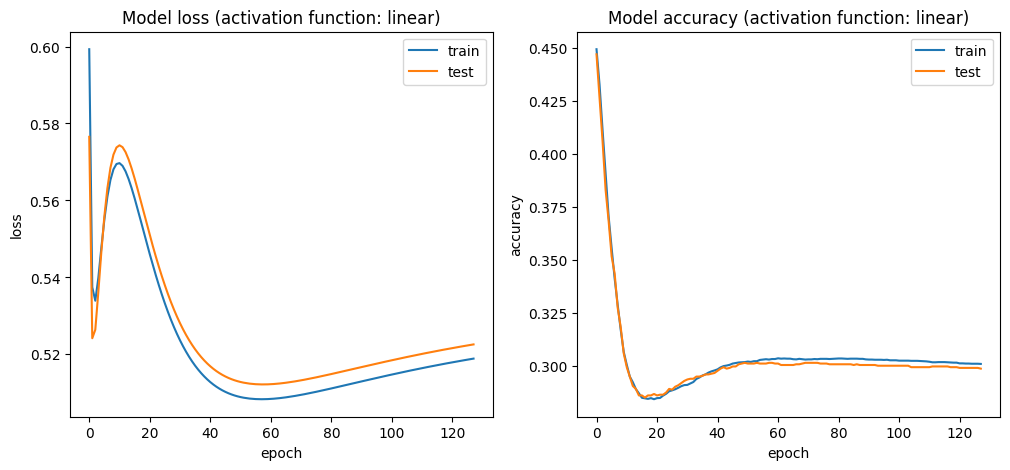

In [188]:
fig , (ax1 , ax2) = plt.subplots(1,2 , figsize=(12,5))


ax1.plot(Loss_Train)
ax1.plot(Loss_Test)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.legend(["train" , "test"])
ax1.title.set_text(f'Model loss (activation function: linear)')

ax2.plot(Acc_Train)
ax2.plot(Acc_Test)
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend(["train" , "test"])
ax2.title.set_text('Model accuracy (activation function: linear)')

plt.show()

In [189]:
# model = Perceptron(learning_rate=0.001, input_length=X_train.shape[1])
# model.fit(X_train, Y_train, epochs=256)

In [190]:
model.evaluate(X_test, Y_test)

(0.5225870892305361, 0.298599248377178)

In [191]:
Y_pred = model.predict(X_test)
Y_pred = Y_pred.reshape(-1)
Y_pred = np.where(Y_pred > 0.5, 1, 0)

In [192]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, Y_pred)

array([[ 155, 2042],
       [  11,  719]], dtype=int64)

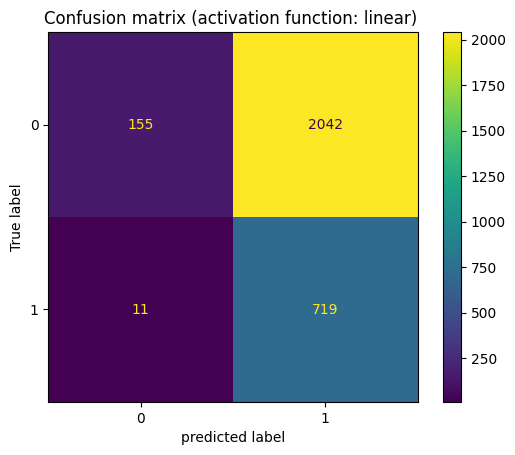

In [193]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.title("Confusion matrix (activation function: linear) ")
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.show()